Best Alpha: 4.328761281083061
Train RMSE: 358.1974901970018, Validation RMSE: 361.54090280641, Test RMSE: 350.06938778698833
Train R² Score: 0.7851842968521556, Validation R² Score: 0.7821253432072287, Test R² Score: 0.7970943552062915


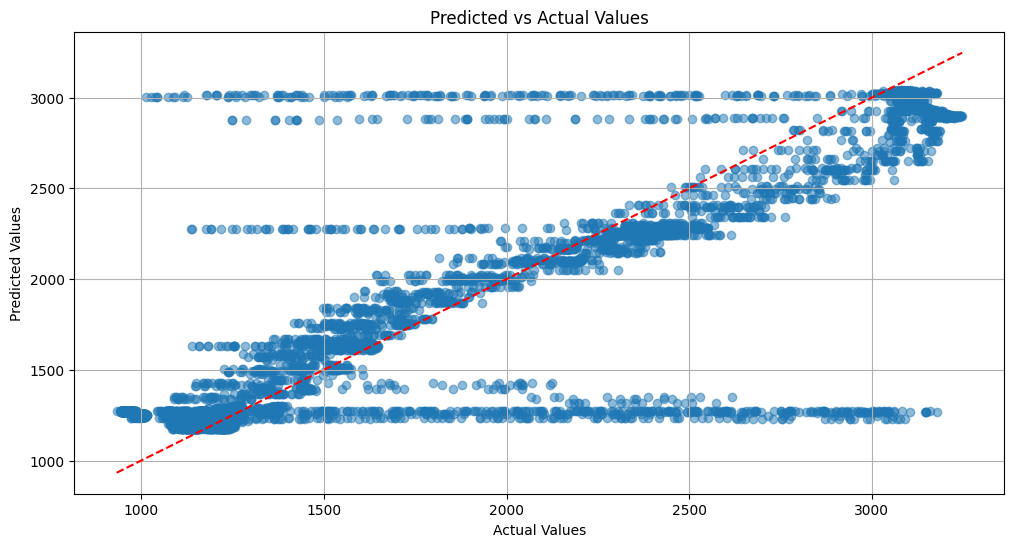

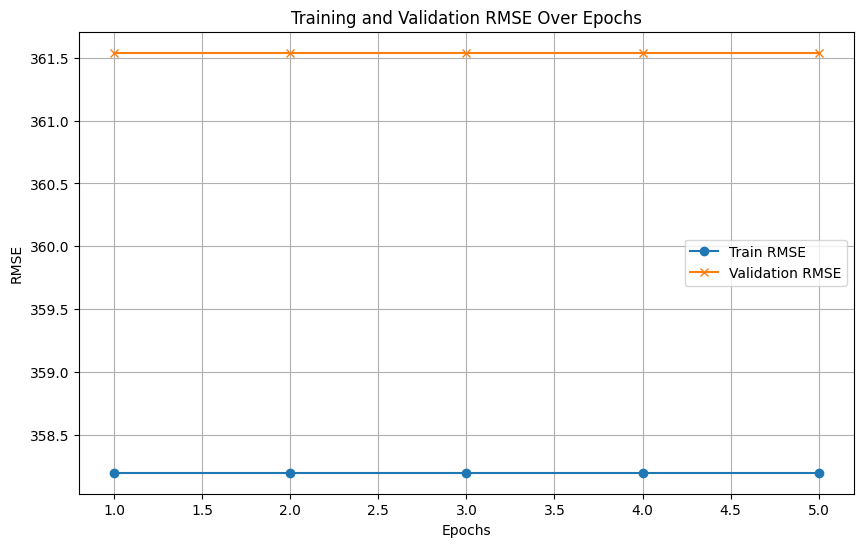

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/kaggle/input/training-for-mri/final_merged_file.csv')

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[['time', 'input_voltage']])

# Target Variable
y = data['el_power']

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning with GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 100)}  # Wider range of alpha values
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Predictions
train_pred = best_model.predict(X_train)
val_pred = best_model.predict(X_val)
test_pred = best_model.predict(X_test)

# Metrics Calculation
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

train_r2 = r2_score(y_train, train_pred)
val_r2 = r2_score(y_val, val_pred)
test_r2 = r2_score(y_test, test_pred)

# Print Results
print(f"Best Alpha: {best_alpha}")
print(f"Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}, Test RMSE: {test_rmse}")
print(f"Train R² Score: {train_r2}, Validation R² Score: {val_r2}, Test R² Score: {test_r2}")

# Visualization of Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.scatter(y_val, val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Visualize Training and Validation Loss
# Note: Storing RMSE for visualization during training, we would need to implement a custom training loop.
# Here we'll assume we already have these values if they were recorded.
# This is a placeholder; adjust as needed based on your training loop implementation.
epochs = np.arange(1, 6)  # Example epochs
train_rmse_history = [train_rmse for _ in epochs]  # Replace with actual values during training
val_rmse_history = [val_rmse for _ in epochs]  # Replace with actual values during training

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_rmse_history, label='Train RMSE', marker='o')
plt.plot(epochs, val_rmse_history, label='Validation RMSE', marker='x')
plt.title('Training and Validation RMSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()


Best Alpha: 0.9326033468832199
Train RMSE: 360.69352683156603, Validation RMSE: 363.0365947818294, Test RMSE: 349.29007000839033
Train R² Score: 0.7821283248010766, Validation R² Score: 0.7806522134087374, Test R² Score: 0.7973883437522609


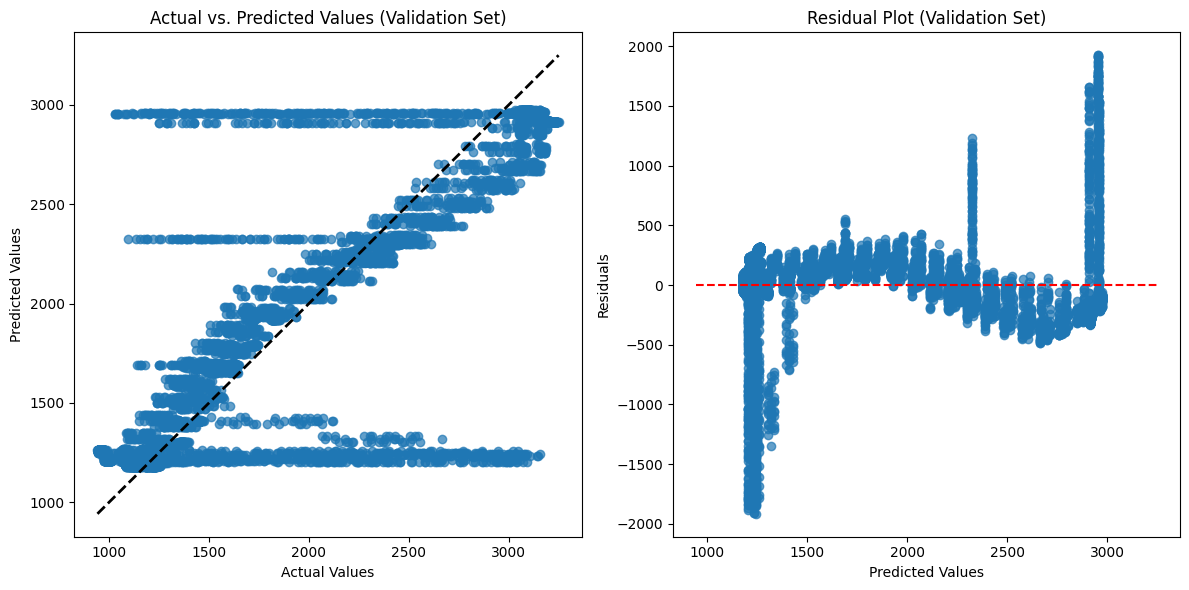

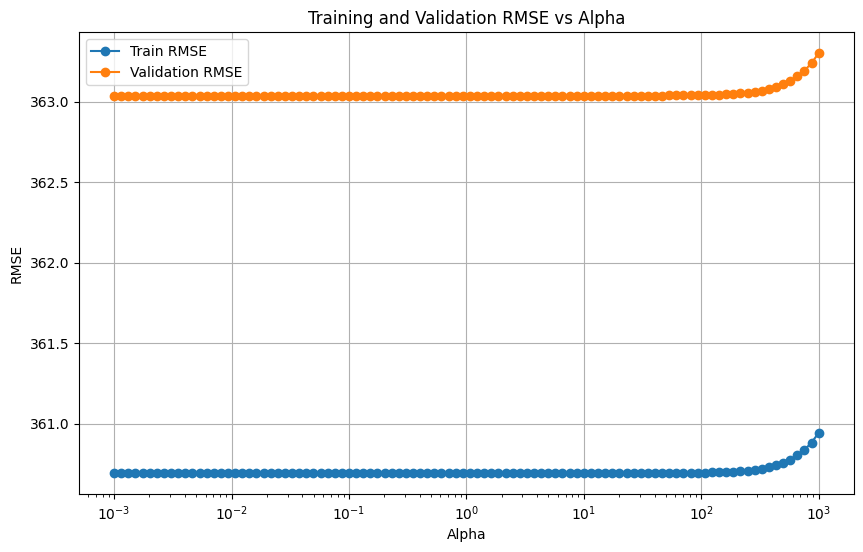

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/kaggle/input/training-for-mri/final_merged_file.csv')

# Features and Target Variable
X = data[['time', 'input_voltage']]
y = data['el_power']

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Ridge regression with hyperparameter tuning
alphas = np.logspace(-3, 3, 100)
ridge_cv = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Best model
best_ridge = ridge_cv.best_estimator_
best_alpha = ridge_cv.best_params_['alpha']

# Predictions
y_train_pred = best_ridge.predict(X_train_scaled)
y_val_pred = best_ridge.predict(X_val_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# Calculate RMSE and R² Scores
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Showcasing the results
print(f'Best Alpha: {best_alpha}')
print(f'Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}, Test RMSE: {test_rmse}')
print(f'Train R² Score: {train_r2}, Validation R² Score: {val_r2}, Test R² Score: {test_r2}')

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Validation Set)')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, y_val_pred - y_val, alpha=0.7)
plt.hlines(y=0, xmin=y_val.min(), xmax=y_val.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Validation Set)')

plt.tight_layout()
plt.show()

# Plot Training and Validation Loss
train_rmse_list = []
val_rmse_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_train_pred = ridge.predict(X_train_scaled)
    y_val_pred = ridge.predict(X_val_scaled)
    train_rmse_list.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse_list.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_rmse_list, label='Train RMSE', marker='o')
plt.plot(alphas, val_rmse_list, label='Validation RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()
